In [1]:
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
def parser(x):
    return datetime.strptime('201'+x, '%Y-%m')

In [10]:
series = pd.read_csv('/Users/leventguner/Downloads/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.head()

Month
2011-01-01    266.0
2011-02-01    145.9
2011-03-01    183.1
2011-04-01    119.3
2011-05-01    180.3
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

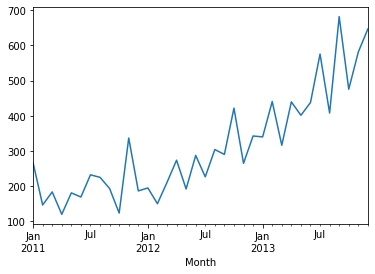

In [11]:
series.plot()

In [12]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

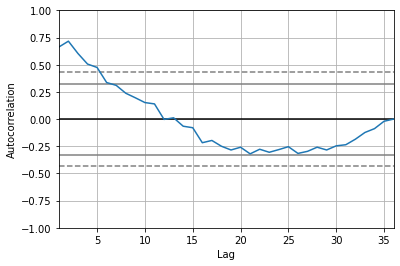

In [13]:
autocorrelation_plot(series)

In [14]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
model_fit.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 07 Dec 2020   AIC                            406.340
Time:                        19:16:56   BIC                            417.227
Sample:                    02-01-2011   HQIC                           410.098
                         - 12-01-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     -2.203      0.028      -1.172      -0.068
ar.L3.D.Sales    -0.3606      0.295     -1.222      0.222      -0.939       0.218
ar.L4.D.Sales    -0.1252      0.280     -0.447      0.655      -0.674       0.424
ar.L5.D.Sales     0.1289      0.191      0.673      0.501      -0.246       0.504
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0617           -0.5064j            1.1763           -0.4292
AR.2           -1.0617           +0.5064j            1.1763            0.4292
AR.3            0.0816           -1.3804j            1.3828           -0.2406
AR.4            0.0816           +1.3804j            1.3828            0.2406
AR.5            2.9315           -0.0000j            2.9315           -0.0000
-----------------------------------------------------------------------------
"""

,0
count,35.000000
mean,-5.495244
std,68.132880
min,-133.296645
25%,-42.477877
50%,-7.186614
75%,24.748305
max,133.237969


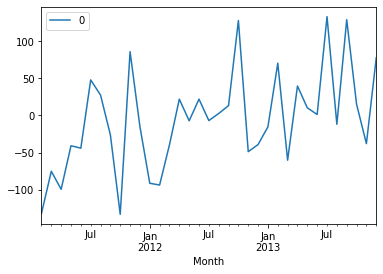

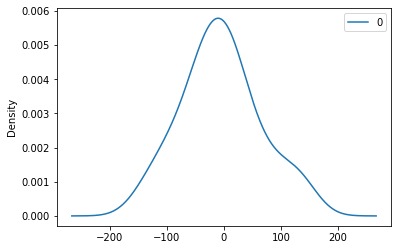

In [15]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
residuals.describe()

In [22]:
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,5))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')


KeyboardInterrupt: 

In [ ]:
output[0]

In [23]:
df = pd.read_csv('data/daily-min-temperatures.csv')

In [25]:
df.Date = df.Date.astype('datetime64')

In [26]:
df.index=df.Date

In [28]:
df = df.drop('Date',axis=1)

In [34]:
from sklearn.metrics import mean_squared_error
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(100,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-48206aae7c66>", line 9, in <module>
    model_fit = model.fit(disp=0)
  File "/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py", line 1200, in fit
    callback, start_ar_lags, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py", line 999, in fit
    callback=callback, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py", line 526, in fit
    full_output=full_output)
  File "/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/optimizer.py", line 218, in _fit
    hess=hessian)
  File "/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/optimizer.py", line 440, in _fit_lbfgs
    **extra_kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/scipy/opt

KeyboardInterrupt: 

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='Date'>

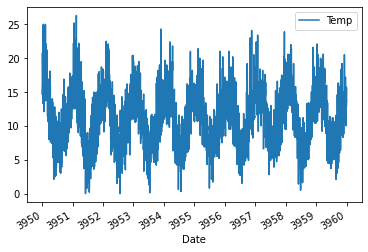

In [36]:
df.plot()

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(df.values, order=(1, 1, 1), seasonal_order=(1, 1, 1, 360))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df), len(df))
print(yhat)